In [1]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
PATH_IMAGE = 'mmsegmentation/data/Glomeruli-dataset/images'
PATH_MASKS = 'mmsegmentation/data/Glomeruli-dataset/masks'

In [7]:
print('图像个数', len(os.listdir(PATH_IMAGE)))
print('标注个数', len(os.listdir(PATH_MASKS)))

图像个数 2575
标注个数 2575


# 查看单张图像及其语义分割标注

In [8]:
# 指定图像文件名
file_name = 'SAS_21883_001_10.png'

In [9]:
img_path = os.path.join(PATH_IMAGE, file_name)
mask_path = os.path.join(PATH_MASKS, file_name)

print('图像路径', img_path)
print('标注路径', mask_path)

图像路径 mmsegmentation/data/Glomeruli-dataset/images/SAS_21883_001_10.png
标注路径 mmsegmentation/data/Glomeruli-dataset/masks/SAS_21883_001_10.png


In [10]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [12]:
img.shape

(1024, 1024, 3)

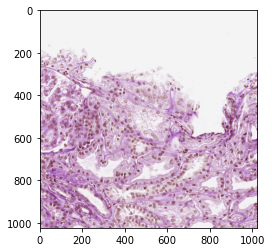

In [13]:
# 可视化图像
plt.imshow(img)
plt.show()

In [14]:
mask.shape

(1024, 1024, 3)

In [15]:
# mask 语义分割标注，与原图大小相同，0 为 背景， 1 为 肾小球
np.unique(mask)

array([0, 1], dtype=uint8)

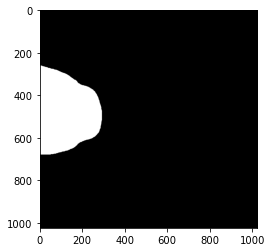

In [18]:
# 可视化语义分割标注
plt.imshow(mask*255)
plt.show()

# 可视化单张图像及其语义分割标注

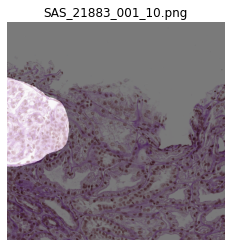

In [19]:
plt.imshow(img)
plt.imshow(mask*255, alpha=0.5) # alpha 高亮区域透明度，越小越接近原图
plt.title(file_name)
plt.axis('off')
plt.show()

# 可视化模板-有前景标注

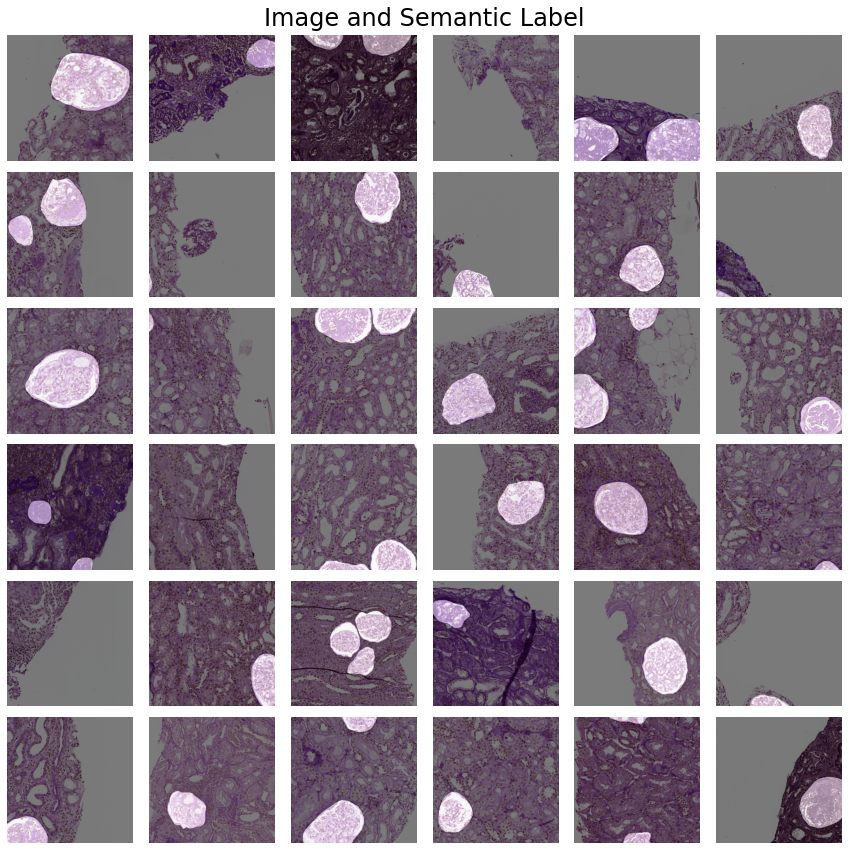

In [21]:
# n行n列可视化
n = 6

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

i = 0

for file_name in os.listdir(PATH_IMAGE):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    if 1 in mask:
        axes[i//n, i%n].imshow(img)
        axes[i//n, i%n].imshow(mask*255, alpha=opacity)
        axes[i//n, i%n].axis('off') # 关闭坐标轴显示
        i += 1
    if i > n**2-1:
        break
fig.suptitle('Image and Semantic Label', fontsize=24)
plt.tight_layout()
plt.show()

# 可视化模板-无论前景是否有标注

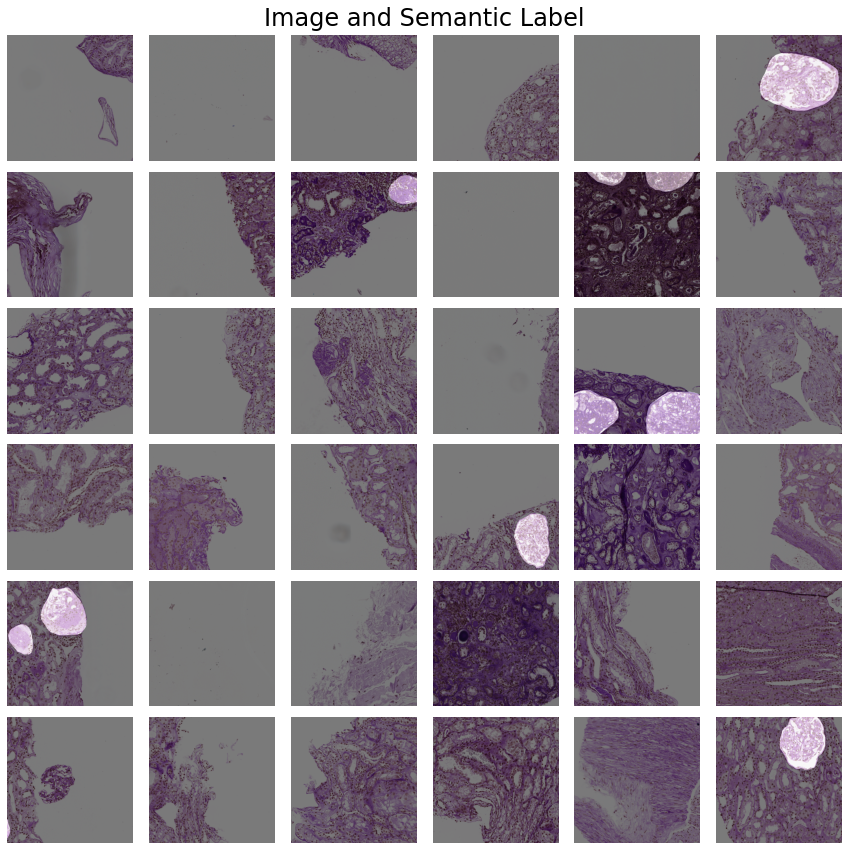

In [23]:
# n行n列可视化
n = 6

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask*255, alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=24)
plt.tight_layout()
plt.show()